**INITIALIZATION:**
- I use these three lines of code on top of my each notebooks because it will help to prevent any problems while reloading the same project. And the third line of code helps to make visualization within the notebook.

In [1]:
#@ INITIALIZATION: 
%reload_ext autoreload
%autoreload 2
%matplotlib inline

**LIBRARIES AND DEPENDENCIES:**
- I have downloaded all the libraries and dependencies required for the project in one particular cell.

In [7]:
#@ IMPORTING NECESSARY LIBRARIES AND DEPENDENCIES: 
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.applications import InceptionV3
from tensorflow.keras.applications import Xception
from tensorflow.keras.applications import VGG16
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import imagenet_utils
from tensorflow.keras.applications.inception_v3 import preprocess_input
from keras.preprocessing.image import img_to_array
from keras.preprocessing.image import load_img
import numpy as np
import cv2
from google.colab.patches import cv2_imshow

**CONVOLUTIONAL NEURAL NETWORKS:**
- Convolutions are just a type of matrix multiplication with two constraints on the weight matrix: some elements are always zero and some elements are tied or forced to always have the same value. Batch Normalization adds some extra randomness to the training process. Larger batches have gradients that are more accurate since they are calculated from more data. But larger batch size means fewer batches per epoch which means fewer opportunities for the model to update weights. 

In [4]:
#@ INITIALIZING PRETRAINED NETWORKS:
inputShape = (224, 224)                             # Initializing input size. 
preprocess = imagenet_utils.preprocess_input        # Initializing preprocess function. 
model = VGG16(weights="imagenet")                   # Initializing pretrained model. 

In [14]:
#@ PROCESSING THE IMAGE:
path = "/content/Bal1.JPG"                                  # Path to image. 
image = load_img(path, target_size=inputShape)              # Initializing image. 
image = img_to_array(image)                                 # Converting into arrays. 
image = np.expand_dims(image, axis=0)                       # Changing dimensions. 
image = preprocess(image)                                   # Preprocessing image. 

#@ INITIALIZING IMAGE CLASSIFICATION:
preds = model.predict(image)                                # Initializing prediction. 
P = imagenet_utils.decode_predictions(preds)                # Decoding predictions. 
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i+1, label, prob*100))

1. cairn: 34.29%
2. Scotch_terrier: 19.27%
3. affenpinscher: 15.79%
4. giant_schnauzer: 10.58%
5. Bouvier_des_Flandres: 8.26%


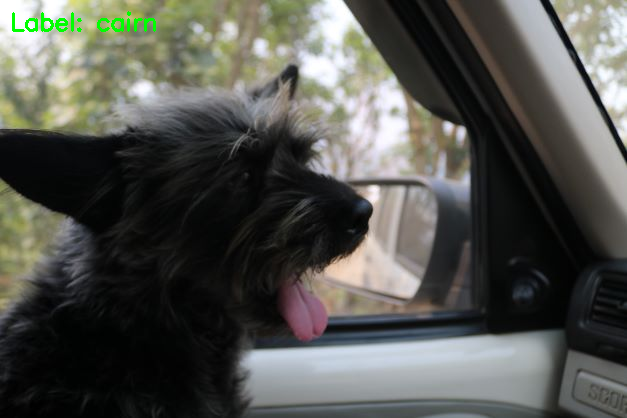

In [15]:
#@ IMPLEMENTATION OF OPENCV: 
orig = cv2.imread(path)                                     # Reading the image.
(imagenetID, label, prob) = P[0][0]                         # Getting predicions. 
cv2.putText(orig, "Label: {}".format(label), (10, 30), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0),2)   # Putting text on image. 
cv2_imshow(orig)                                            # Inspecting image. 

**XCEPTION NETWORKS:**
- **VGG16**, **VGG19**, and **ResNet** all accept *224 x 224* input images while **InceptionV3** and **Xception** requires *299 x 299* pixel inputs. 

In [17]:
#@ INITIALIZING PRETRAINED NETWORKS:
inputShape = (299, 299)                             # Initializing input size. 
preprocess = preprocess_input                       # Initializing preprocess function. 
model = Xception(weights="imagenet")                # Initializing pretrained model. 

In [18]:
#@ PROCESSING THE IMAGE:
path = "/content/Bal1.JPG"                                  # Path to image. 
image = load_img(path, target_size=inputShape)              # Initializing image. 
image = img_to_array(image)                                 # Converting into arrays. 
image = np.expand_dims(image, axis=0)                       # Changing dimensions. 
image = preprocess(image)                                   # Preprocessing image. 

#@ INITIALIZING IMAGE CLASSIFICATION:
preds = model.predict(image)                                # Initializing prediction. 
P = imagenet_utils.decode_predictions(preds)                # Decoding predictions. 
for (i, (imagenetID, label, prob)) in enumerate(P[0]):
    print("{}. {}: {:.2f}%".format(i+1, label, prob*100))

1. cairn: 74.46%
2. Scotch_terrier: 13.76%
3. Bouvier_des_Flandres: 0.87%
4. giant_schnauzer: 0.63%
5. affenpinscher: 0.60%


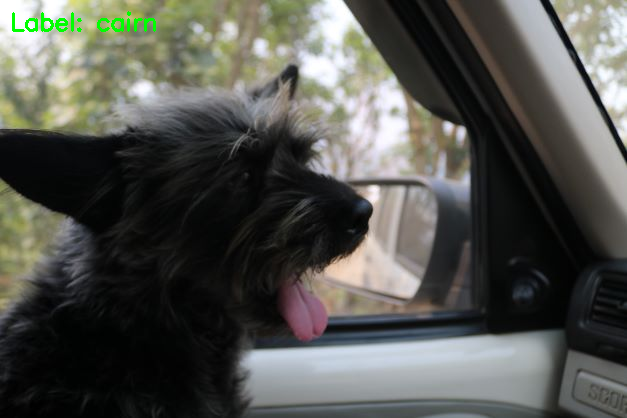

In [19]:
#@ IMPLEMENTATION OF OPENCV: 
orig = cv2.imread(path)                                     # Reading the image.
(imagenetID, label, prob) = P[0][0]                         # Getting predicions. 
cv2.putText(orig, "Label: {}".format(label), (10, 30), 
            cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0),2)   # Putting text on image. 
cv2_imshow(orig)                                            # Inspecting image. 